In [64]:
import obspy
from obspy.core.utcdatetime import UTCDateTime
import pandas as pd
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cat = pd.read_csv("../data/catalogs/yellowstone.events.2024.csv")

In [14]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
all_holdout_df = pd.read_csv(f'{data_dir}/p.20230101.csv')

In [19]:
YDC_holdout_df = all_holdout_df[all_holdout_df["station"] == "YDC"]
YDC_holdout_df.head()

,event_identifier,arrival_identifier,network,station,channel,location_code,source_latitude,source_longitude,source_receiver_distance_km,source_receiver_back_azimuth,...,avg_noise_15.00,avg_signal_15.00,avg_noise_16.00,avg_signal_16.00,avg_noise_17.00,avg_signal_17.00,avg_noise_18.00,avg_signal_18.00,Evid,Event-Mean-YPML-S
161,60530187,10787874,WY,YDC,EHZ,1,44.750833,-111.112333,11.083656,65.472771,...,0.002647,0.009066,0.002076,0.007141,0.001631,0.005642,0.001288,0.004485,60530187.0,0.844143
272,60530391,10792703,WY,YDC,EHZ,1,44.798833,-110.960000,24.268506,65.755645,...,0.002471,0.010191,0.001949,0.008061,0.001538,0.006375,0.001220,0.005059,60530391.0,1.848922
288,60530416,10783777,WY,YDC,EHZ,1,44.789500,-110.968833,23.216969,67.390291,...,0.002017,0.009182,0.001599,0.007223,0.001266,0.005674,0.001006,0.004473,60530416.0,1.514478
313,60530456,10784722,WY,YDC,EHZ,1,44.793000,-110.965333,23.622695,66.774380,...,0.002890,0.009608,0.002294,0.008011,0.001820,0.006659,0.001448,0.005525,60530456.0,2.346048
358,60530466,10785326,WY,YDC,EHZ,1,44.797333,-110.967000,23.694905,65.577927,...,0.002132,0.012056,0.001737,0.009801,0.001404,0.007936,0.001131,0.006423,60530466.0,2.440536


In [25]:
YDC_2023_cat = cat[cat["evid"].isin(YDC_holdout_df.event_identifier)]

In [43]:
times = YDC_2023_cat.apply(lambda x: UTCDateTime(x["origin_time"]), axis=1).values

In [47]:
cont_data_dir = "/uufs/chpc.utah.edu/common/home/koper-group3/alysha/ys_data/downloaded_all_data"

2 Trace(s) in Stream:
WY.YDC.01.EHZ | 2023-02-10T00:00:00.000000Z - 2023-02-10T05:30:08.790000Z | 100.0 Hz, 1980880 samples
WY.YDC.01.EHZ | 2023-02-10T05:30:11.900000Z - 2023-02-11T00:00:00.000000Z | 100.0 Hz, 6658811 samples
2 Trace(s) in Stream:
WY.YDC.01.EHZ | 2023-02-10T00:00:00.000000Z - 2023-02-10T05:30:08.790000Z | 100.0 Hz, 1980880 samples
WY.YDC.01.EHZ | 2023-02-10T05:30:11.900000Z - 2023-02-11T00:00:00.000000Z | 100.0 Hz, 6658811 samples


Text(0.5, 0, 'Time After Origin (s)')

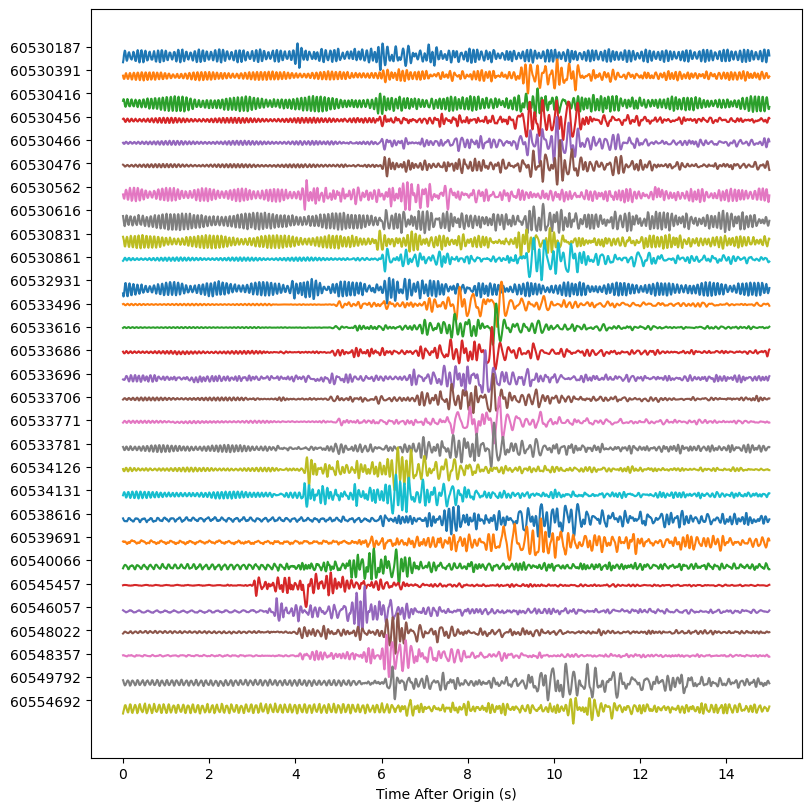

In [86]:
fig, ax = plt.subplots(1, 
                       figsize=(8, 8),
                       constrained_layout=True)
y_labels = []
for i in range(len(times)):
    time = times[i]
    wf_file = f"{cont_data_dir}/{time.year}/{time.month:02d}/{time.day:02d}/*YDC*mseed"
    st  = obspy.read(wf_file)
    if len(st) > 1:
        print(st)
        st.merge()
    st[0].trim(time, time+15)
    st.normalize()
    ax.plot(np.arange(0, 15.01, 0.01), st[0].data-i)
    evid = YDC_2023_cat.iloc[i].evid
    y_labels.append(evid)
ax.set_yticks(np.arange(0, -(i+1), -1), y_labels);
ax.set_xlabel("Time After Origin (s)")